In [1]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

Data Acquisition

In [2]:
movies_df = pd.read_csv('dataset-ml-25m/movies.csv', sep=',')
#One-hot encoding of genres for movies
genres = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres], axis=1)
movies_df.drop('genres', axis=1, inplace=True)
movies_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
gen_tags = pd.read_csv('dataset-ml-25m/genome-tags.csv', sep=',')
gen_scores = pd.read_csv('dataset-ml-25m/genome-scores.csv', sep=',')

df = movies_df.merge(gen_scores,on='movieId')
df = df.merge(gen_tags, on='tagId')
df = df.pivot_table(index=['movieId', 'title'], columns='tag', values='relevance', fill_value=0).reset_index().rename_axis(None, axis=1)


In [4]:
df.head()

,movieId,title,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,1,Toy Story (1995),0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
1,2,Jumanji (1995),0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
2,3,Grumpier Old Men (1995),0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
3,4,Waiting to Exhale (1995),0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
4,5,Father of the Bride Part II (1995),0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [5]:
ratings = pd.read_csv('dataset-ml-25m/ratings.csv', sep=',')
# Get the most frequent rating for each movie with mean
ratings = ratings.groupby(['movieId'])['rating'].mean().reset_index()
print (ratings.shape)

#Rounded to the nearest 0.5
def myround(x, prec=2, base=.5):
    return round(base * round(float(x)/base),prec)

ratings["rating"] = ratings["rating"].apply(lambda x:myround(x))

#Merge movies_rating with film rating
df = ratings.merge(df, on='movieId') 

df = df.drop(['movieId','title'], axis=1)
#put the rating column at the end
#cols = list(dataset.columns.values)
#cols.pop(cols.index('rating'))
#dataset = dataset[cols+['rating']]

(59047, 2)


Data Visualization

In [6]:
print(f'Number of samples: {df.shape[0]}')
df.head()

Number of samples: 13816


,rating,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,4.0,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
1,3.5,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
2,3.0,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
3,3.0,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
4,3.0,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [7]:
# missing values and duplicates
print("Nan: ", df.isna().sum().sum())
print("Duplicates: ", df.duplicated().sum())

Nan:  0
Duplicates:  0


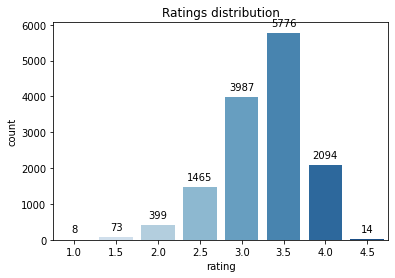

Median of rating:  3.5
Mode of rating:  0    3.5
Name: rating, dtype: float64
Standard deviation of rating:  0.5044376797466746


<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x='rating', data=df, palette='Blues')

plt.title('Ratings distribution')
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()
plt.savefig('imgs/unbalance.png')

#mean, median and stardard deviation of rating
print("Median of rating: ", df['rating'].median())
print("Mode of rating: ", df['rating'].mode())
print("Standard deviation of rating: ", df['rating'].std())

In [9]:
df.to_csv("dataset-ml-25m/dataset.csv",index=False)

In [10]:
#dataset = pd.read_csv('dataset-ml-25m/dataset.csv', sep=',')

Data Prepocessing

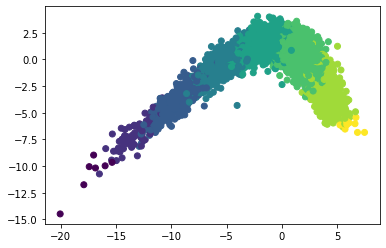

Number of train set:  10362
Numebr of test set:  3454


In [17]:
#split data and labels 
X = df.drop(['rating'], axis=1)
y = df['rating']

#label encoding
y = LabelEncoder().fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#normalization of data - LDA
lda = LDA()
lda.fit(X, y)
X = lda.transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#count the numebr of x_train 
print("Number of train set: ", X_train.shape[0])
print("Numebr of test set: ", X_test.shape[0])
